In [242]:
# import the dependencies
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')

#functions written for this project doc in translator_fcn:
from exploratory_experiments import translator_fcn 
from importlib import reload
reload(translator_fcn)
# general imports
import warnings
import numpy as np
from numpy import random
import pandas as pd
import scanpy as sc
from anndata import AnnData as ad
from tabulate import tabulate

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from scipy.stats import spearmanr, pearsonr
from collections import Counter

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# programming stuff
import time
import os, sys
import pickle
from pathlib import Path


In [243]:
#results paths:
path = os.getcwd()
processed_path = f"{path}/../data/mouse_kidney/processed/"

In [244]:
#scanpy config.
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.7.8 umap==0.5.3 numpy==1.19.5 scipy==1.7.1 pandas==1.3.3 scikit-learn==1.0 statsmodels==0.13.0 python-igraph==0.9.11 louvain==0.8.0 pynndescent==0.5.8


In [245]:
#reading in the preprocessed data
sn_path = f"{processed_path}M7_sn_notfiltered_scaled.h5ad"
sc_path = f"{processed_path}M7_sc_notfiltered_scaled.h5ad"
single_path = f"{processed_path}M7_singlecombined_notfiltered_scaled.h5ad"
bulk_path = f"{processed_path}M7_bulk_notfiltered_scaled.h5ad"

sn_adata = sc.read_h5ad(sn_path)
sc_adata = sc.read_h5ad(sc_path)
single_adata = sc.read_h5ad(single_path) 
bulk_adata = sc.read_h5ad(bulk_path)

In [246]:
matching_celltypes = ['CD_IC', 'CD_PC', 'CNT', 'DCT', 'Endo', 'MC', 'MPH', 'PT', 'Podo', 'aLOH']

xtrain is (6888, 13334)
ytrain is (3671, 13334)
Coefficients: 
 [[0.3159826]]
Mean squared error: 0.00
Coefficient of determination: -0.03


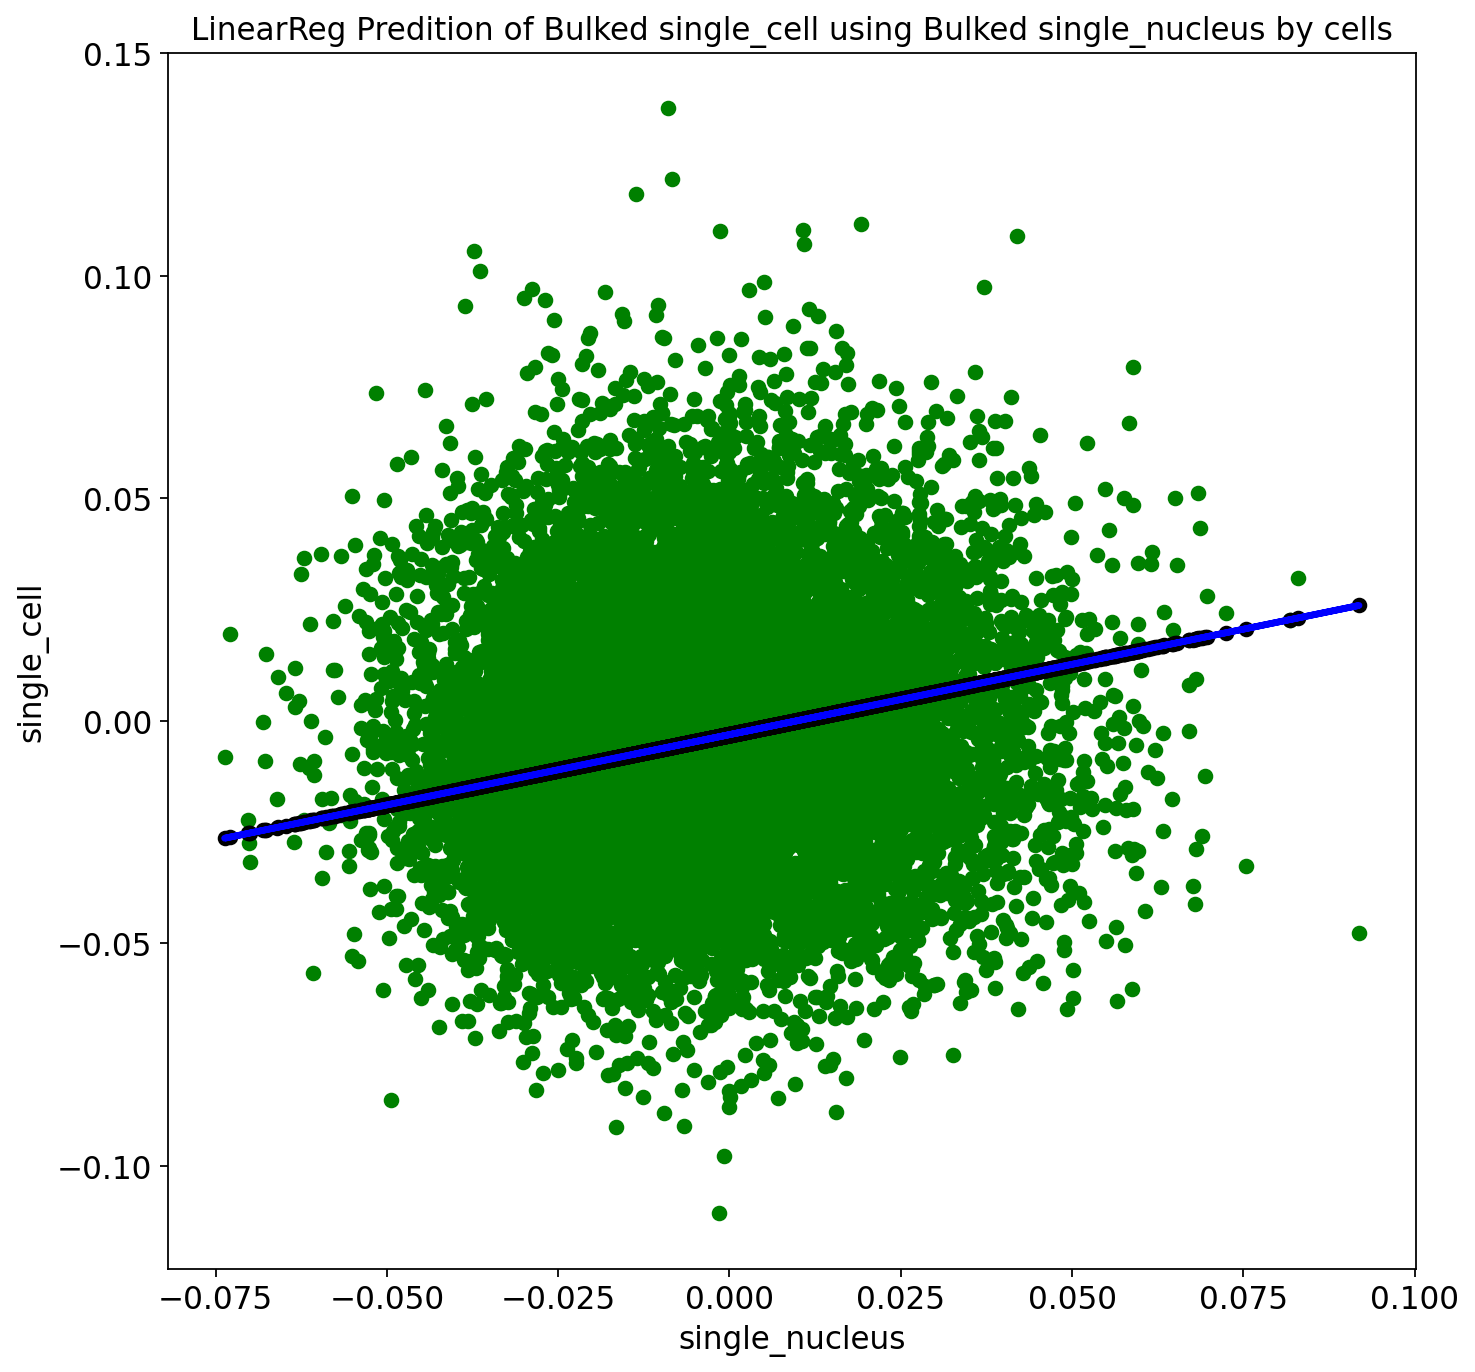

In [247]:
regr, x_train, y_train, x_test, y_test, y_pred = translator_fcn.linear_model_bulked(sn_adata, sc_adata, 0.2,"cells", "single_nucleus", "single_cell")

xtrain is (8611, 10667)
ytrain is (4590, 10667)
Coefficients: 
 [[0.469529]]
Mean squared error: 0.00
Coefficient of determination: 0.33


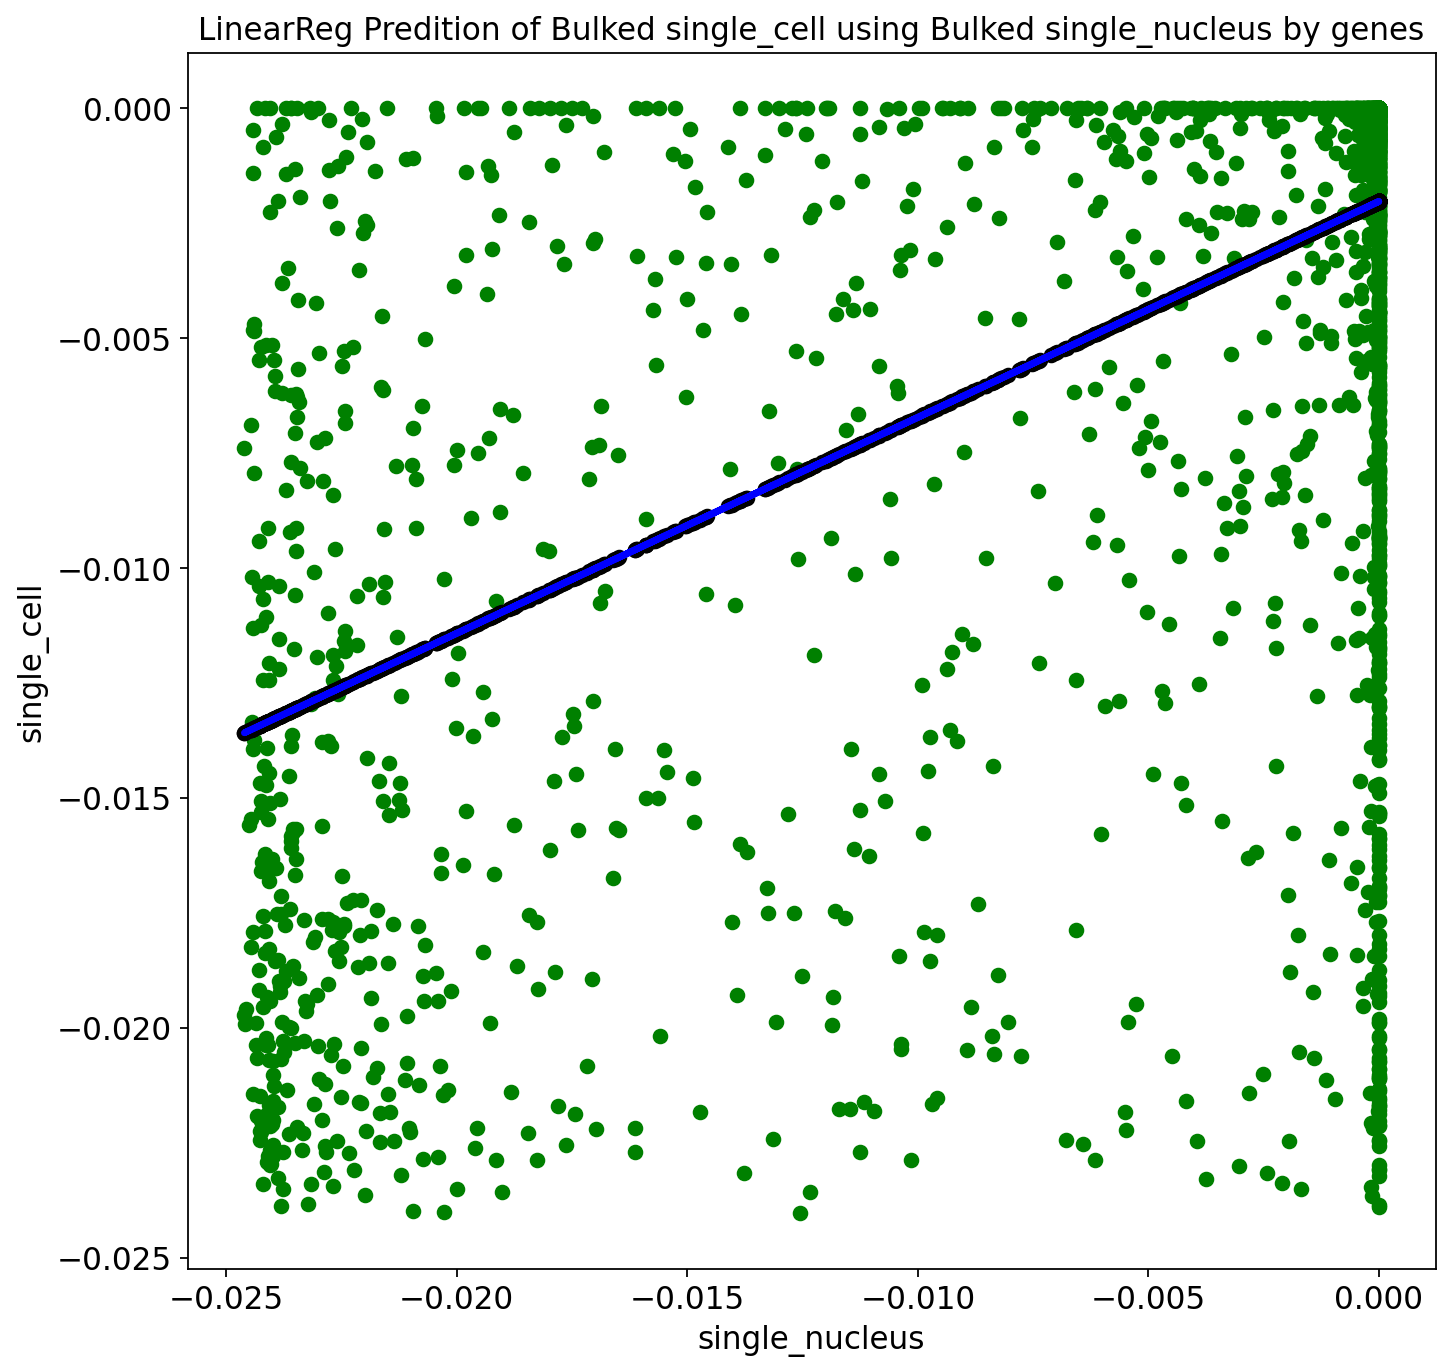

In [248]:
regr, x_train, y_train, x_test, y_test, y_pred = translator_fcn.linear_model_bulked(sn_adata, sc_adata, 0.2, "genes", "single_nucleus", "single_cell")

xtrain is (8611, 10667)
ytrain is (1, 10667)
Coefficients: 
 [[20.06653]]
Mean squared error: 0.18
Coefficient of determination: 0.15


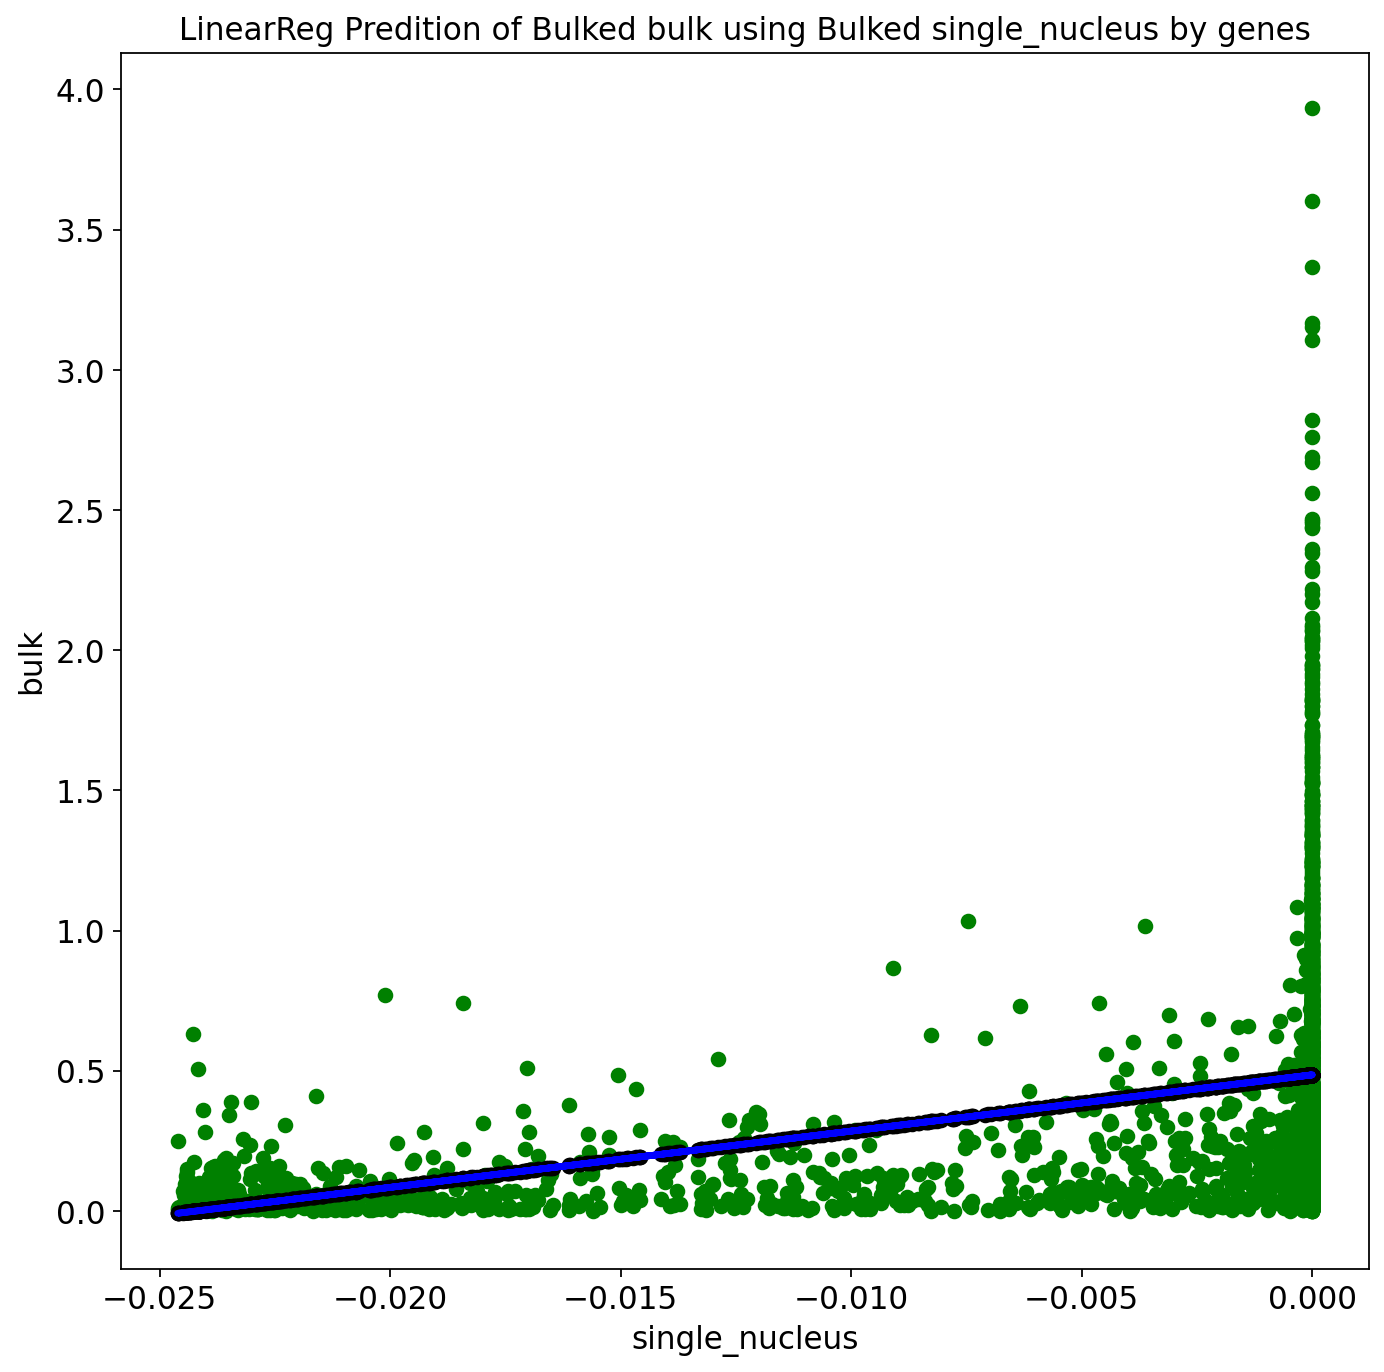

In [254]:
regr, x_train, y_train, x_test, y_test, y_pred = translator_fcn.linear_model_bulked(sn_adata, bulk_adata, 0.2,"genes", "single_nucleus", "bulk")

In [ ]:
regr, x_train, y_train, x_test, y_test, y_pred = translator_fcn.linear_model_bulked(sn_adata, bulk_adata, 0.2,"genes", "single_nucleus", "single_cell")

In [65]:
values_df = pd.DataFrame(columns=matching_celltypes, index=["PearsonCorr", "MeanSqError"])

In [67]:
#calculate and save pearon correlations
values_df["CD_IC"]["PearsonCorr"] = pearsonr(y_test_CD_IC, y_pred_CD_IC)[0]

values_df["CD_PC"]["PearsonCorr"] = pearsonr(y_test_CD_PC, y_pred_CD_PC)[0]

values_df["CNT"]["PearsonCorr"] = pearsonr(y_test_CNT, y_pred_CNT)[0]

values_df["DCT"]["PearsonCorr"] = pearsonr(y_test_DCT, y_pred_DCT)[0]

values_df["Endo"]["PearsonCorr"] = pearsonr(y_test_Endo, y_pred_Endo)[0]

values_df["MC"]["PearsonCorr"] = pearsonr(y_test_MC, y_pred_MC)[0]

values_df["MPH"]["PearsonCorr"] = pearsonr(y_test_MPH, y_pred_MPH)[0]

values_df["PT"]["PearsonCorr"] = pearsonr(y_test_PT, y_pred_PT)[0]

values_df["Podo"]["PearsonCorr"] = pearsonr(y_test_Podo, y_pred_Podo)[0]

values_df["aLOH"]["PearsonCorr"] = pearsonr(y_test_aLOH, y_pred_aLOH)[0]

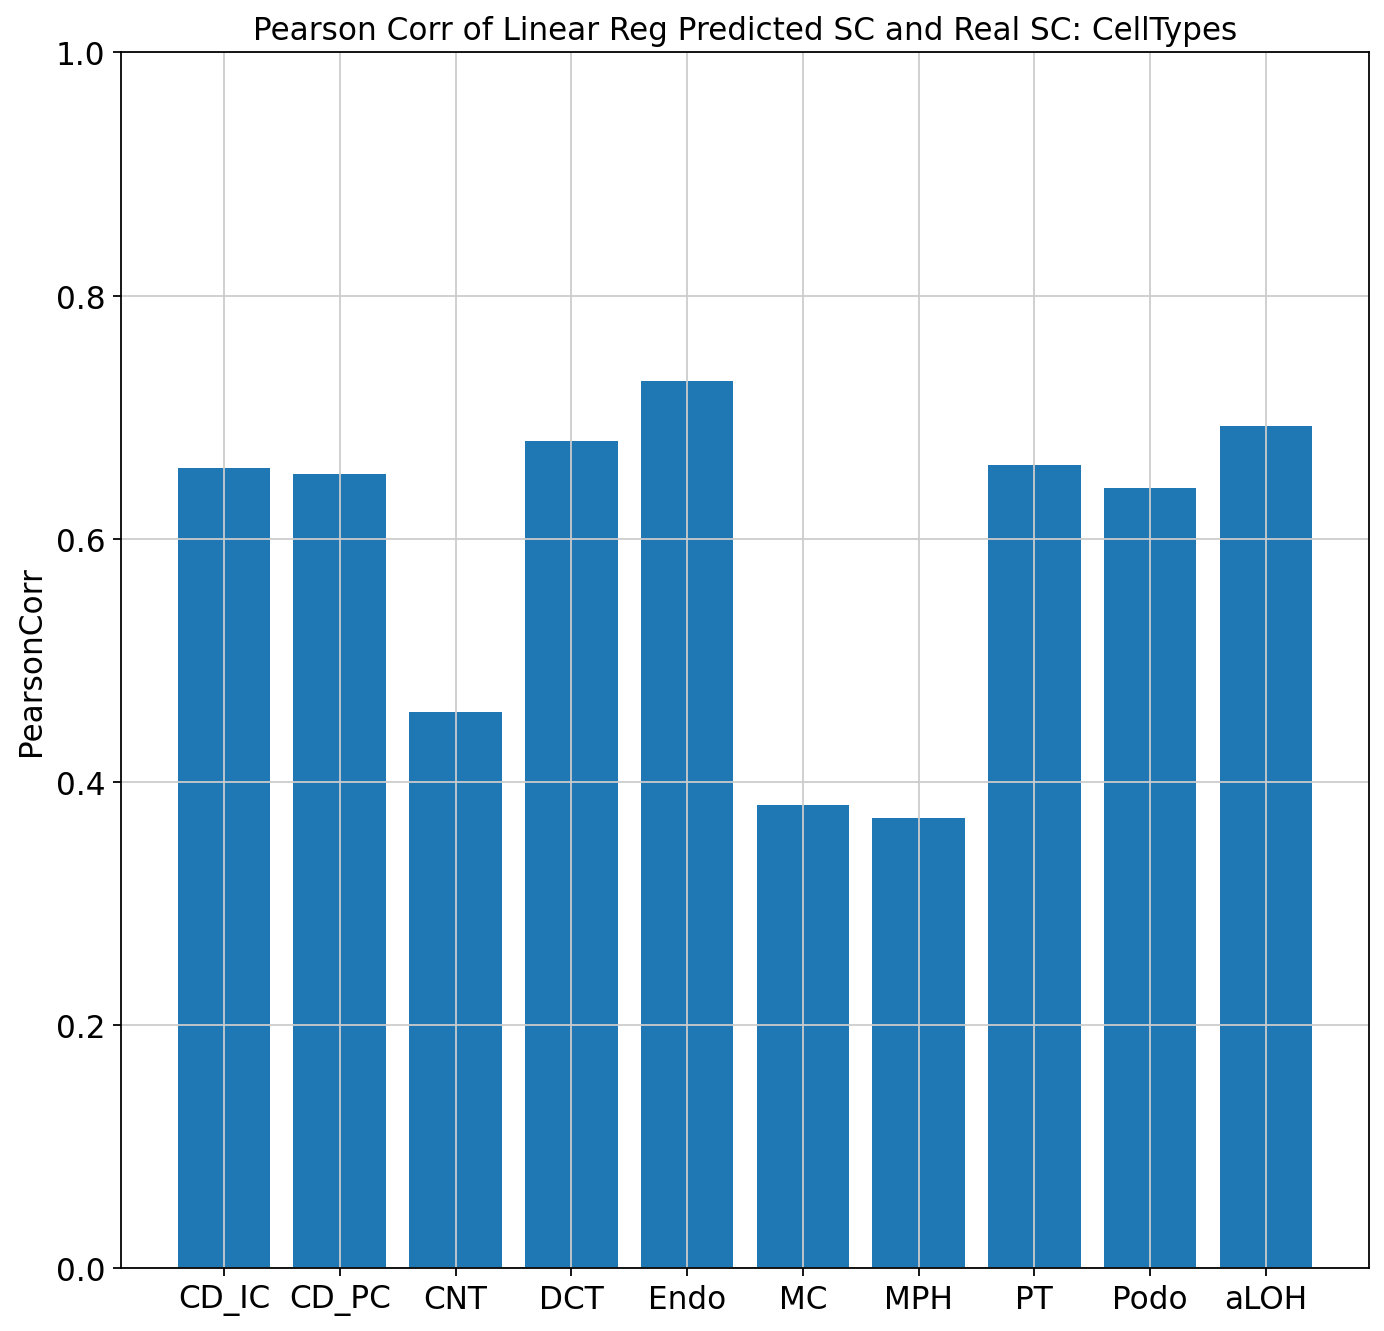

In [69]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df.columns
counts = values_df.iloc[0]
bar_labels = values_df.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylim([0,1])
ax.set_ylabel('PearsonCorr')
ax.set_title('Pearson Corr of Linear Reg Predicted SC and Real SC: CellTypes')

plt.show()

In [70]:
#calculate and save pearon correlations
values_df["CD_IC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CD_IC, y_pred_CD_IC)

values_df["CD_PC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CD_PC, y_pred_CD_PC)

values_df["CNT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_CNT, y_pred_CNT)

values_df["DCT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_DCT, y_pred_DCT)

values_df["Endo"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_Endo, y_pred_Endo)

values_df["MC"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_MC, y_pred_MC)

values_df["MPH"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_MPH, y_pred_MPH)

values_df["PT"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_PT, y_pred_PT)

values_df["Podo"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_Podo, y_pred_Podo)

values_df["aLOH"]["MeanSqError"] = translator_fcn.mean_sqr_error(y_test_aLOH, y_pred_aLOH)

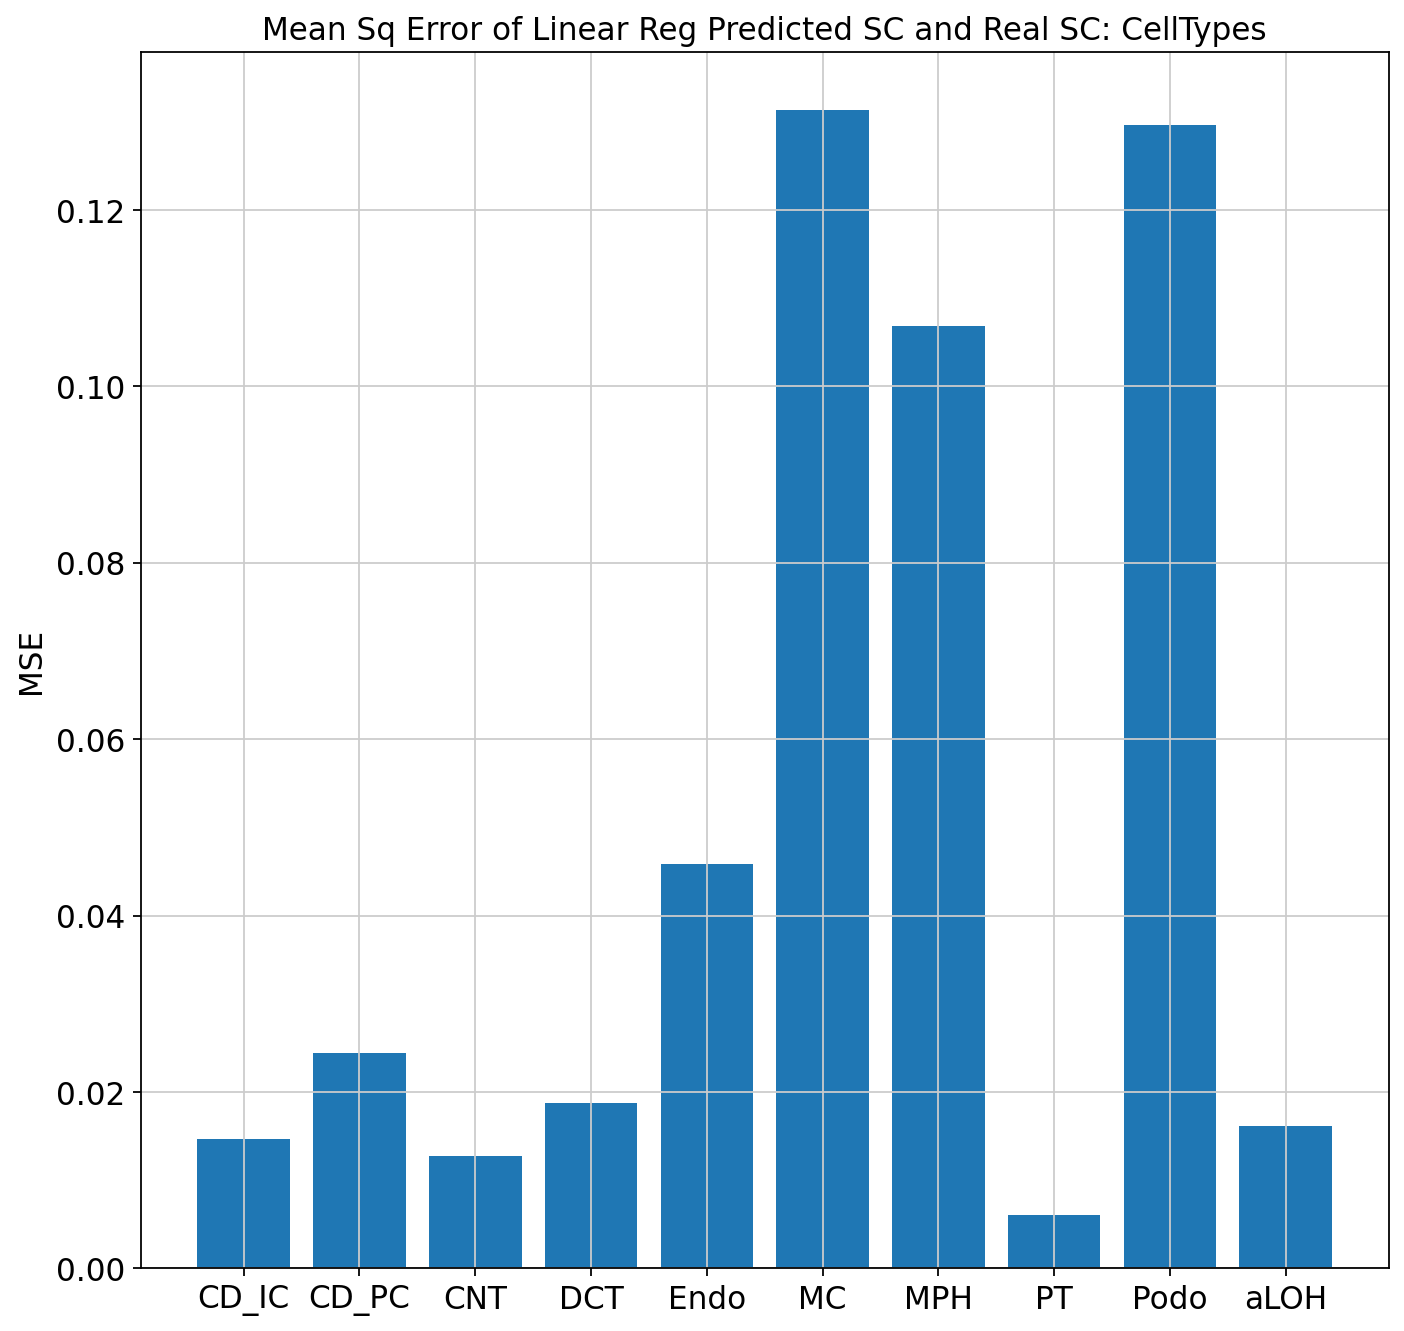

In [71]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
titles = values_df.columns
counts = values_df.iloc[1]
bar_labels = values_df.columns

ax.bar(titles, counts, label=bar_labels)
ax.set_ylabel('MSE')
ax.set_title('Mean Sq Error of Linear Reg Predicted SC and Real SC: CellTypes')

plt.show()